## OBJECTIVE: FIND A BEST PATH TO BECOME A DATA SCIENTIST FROM THE INSIGHTS OF THE DATA 

In [88]:
#importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from tqdm import tqdm
from operator import truediv
import matplotlib as mpl

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# READING DATASET(WE CONVERTED THE GIVE CSV TO XLSX FORMAT)
data = pd.read_excel('H:\\tulasi\\datastrata\\data.xlsx')

In [3]:
data.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(16716, 228)

In [5]:
columns_list = list(data.columns)

## Job Profiles Distributions

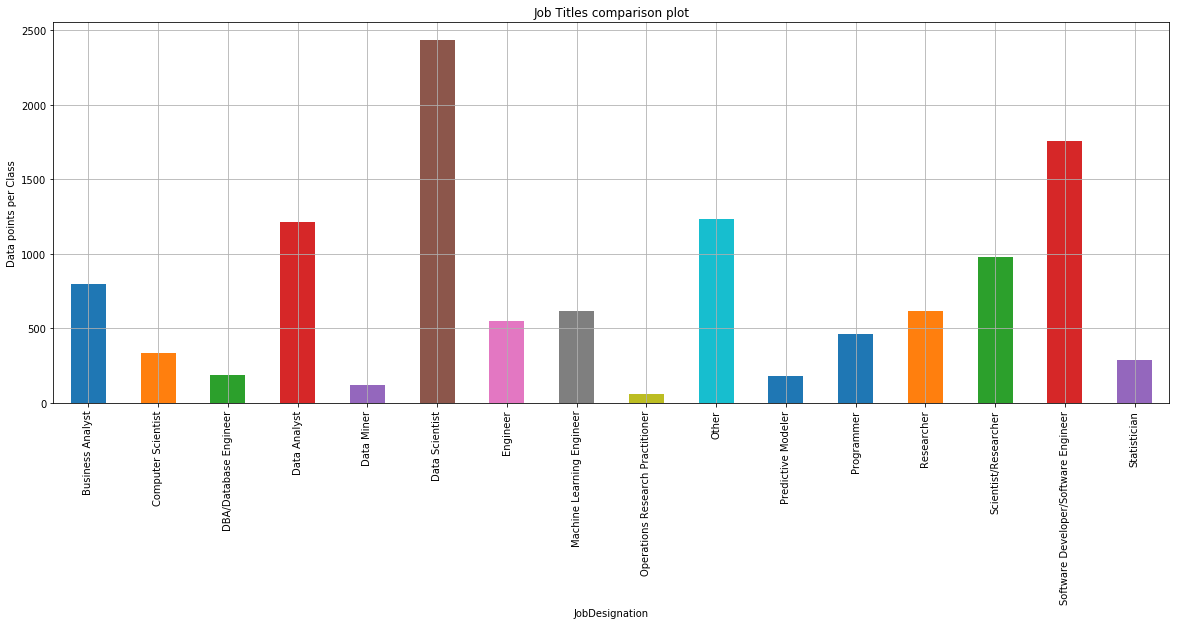

In [6]:
jobtitles = data['CurrentJobTitleSelect'].value_counts().sortlevel()
my_colors = 'rgbkymc'
jobtitles.plot(kind='bar',figsize=(20,7))
plt.xlabel('JobDesignation')
plt.ylabel('Data points per Class')
plt.title('Job Titles comparison plot')
plt.grid()
plt.show()

* Compared to all job profiles percentage of data scientists are more.

## Programming languages used

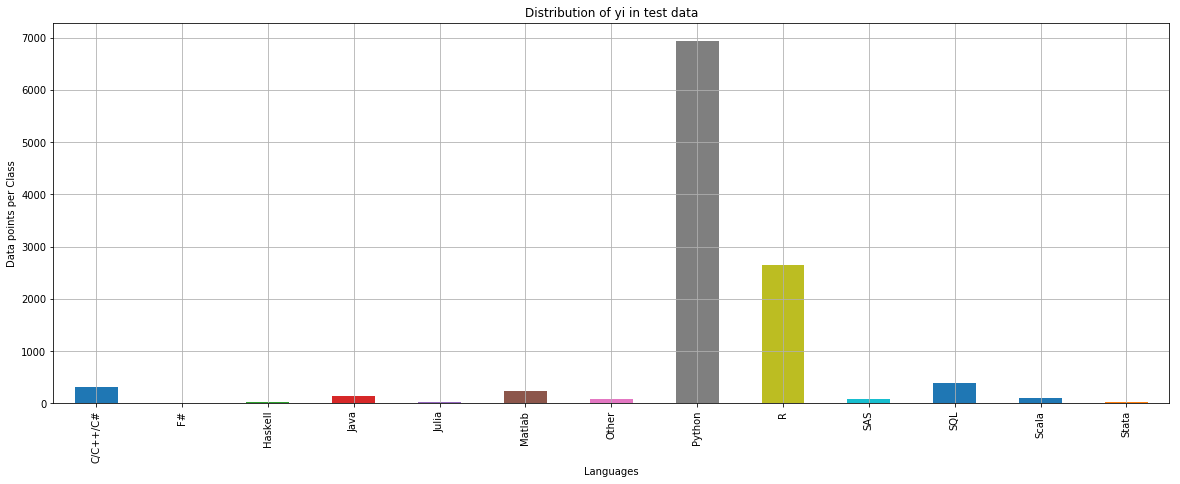

In [7]:
languages = data['LanguageRecommendationSelect'].value_counts().sortlevel()
my_colors = 'rgbkymc'
languages.plot(kind='bar',figsize=(20,7))
plt.xlabel('Languages')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

* From the distributions it is very clear that python and R are most used programming languages irrespective of the field of the work and they are outperforming other.

* And compared to R language, python is far more used .

### Python vs R 

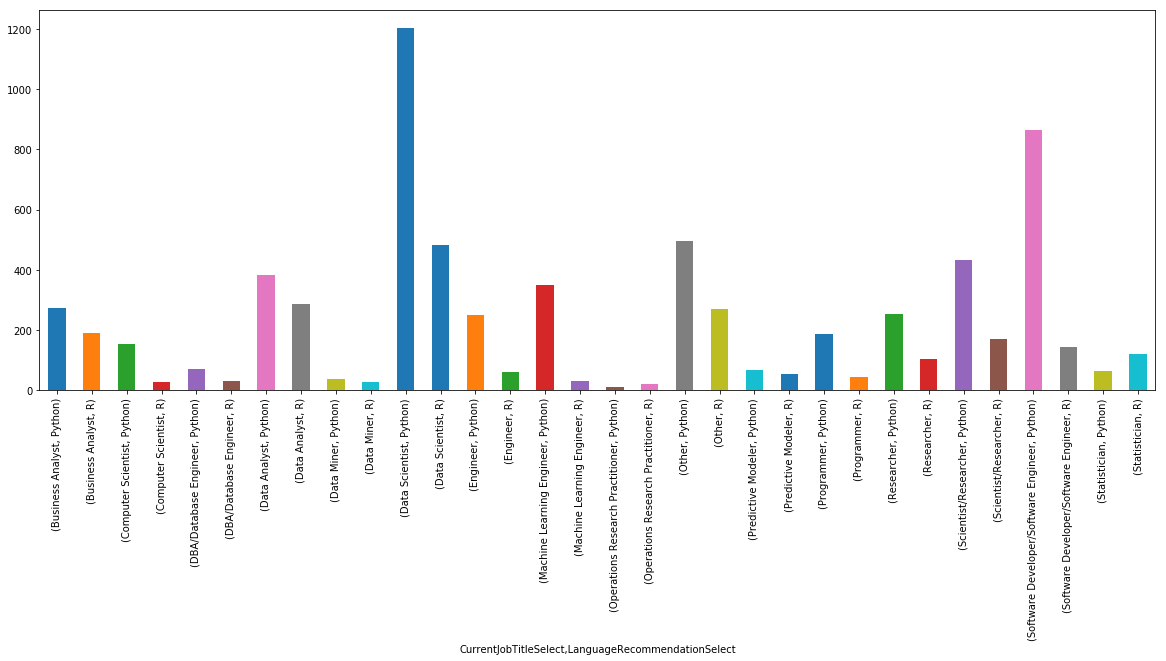

In [8]:
#As we have seen the python and R are most used programming languages lets see some insights
array = ['Python','R']
python_r = data.loc[data['LanguageRecommendationSelect'].isin(array)]
python_r = python_r.dropna(subset=['CurrentJobTitleSelect'])
x = python_r.groupby(['CurrentJobTitleSelect','LanguageRecommendationSelect'])['LanguageRecommendationSelect'].count()
x.plot(x="CurrentJobTitleSelect",y="LanguageRecommendationSelect",kind = "bar",figsize=(20,7));

* We can infere Python is leading programming language compared to R in every field.

In [8]:
# Splitting data based on job title.
DS = data[data['CurrentJobTitleSelect']=='Data Scientist']
STS = data[data['CurrentJobTitleSelect']=='Statistician']
ML = data[data['CurrentJobTitleSelect']=='Machine Learning Engineer']
SE = data[data['CurrentJobTitleSelect']=='Software Developer/Software Engineer']

In [145]:
data['CurrentJobTitleSelect'].value_counts()

Data Scientist                          2433
Software Developer/Software Engineer    1759
Other                                   1233
Data Analyst                            1213
Scientist/Researcher                     978
Business Analyst                         796
Researcher                               619
Machine Learning Engineer                617
Engineer                                 552
Programmer                               462
Computer Scientist                       335
Statistician                             289
DBA/Database Engineer                    187
Predictive Modeler                       181
Data Miner                               118
Operations Research Practitioner          58
Name: CurrentJobTitleSelect, dtype: int64

### Learning Platform 

In [64]:
resource_columns = [col for col in data if col.startswith('LearningPlatformUsefulness')]
resource_df = data[resource_columns]
resource_df_after = resource_df.reindex(columns=resource_columns).fillna(0)
resource_df_after.head()

,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube
0,0,0,0,0,Very useful,0,0,0,0,0,0,0,Very useful,0,0,Somewhat useful,0,0
1,0,0,0,0,0,0,Somewhat useful,0,0,0,0,0,0,0,0,0,0,0
2,Very useful,0,Somewhat useful,0,0,0,Somewhat useful,0,0,0,Very useful,0,0,0,0,0,0,Very useful
3,0,Very useful,Very useful,0,Very useful,Very useful,0,0,0,Very useful,Very useful,Very useful,0,0,0,0,0,0
4,Very useful,0,0,0,Somewhat useful,0,Somewhat useful,0,0,0,0,0,0,0,Somewhat useful,0,0,0


In [65]:
used = []
increment=0;
actually_useful=[]
for i in tqdm(resource_columns):
    count =0;
    for j in range(resource_df_after.shape[0]): 
        if(resource_df_after[i][j]!=0):
            count+=1
        if(resource_df_after[i][j]=='Very useful'):
            resource_df_after[i][j]=100
        if(resource_df_after[i][j]=='Somewhat useful'):
            resource_df_after[i][j]=50
        if(resource_df_after[i][j]=='Not Useful'):    
            resource_df_after[i][j]=0
    increment+=1        
    used.insert(increment,count)        
    actually_useful.insert(increment,resource_df_after[i].sum(),)       
            
            

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:21<00:00,  1.22s/it]


In [66]:
def remove_cruft(s):
    return s[26:]
resource_columns = [remove_cruft(s) for s in resource_columns]

In [67]:
learning_df = pd.DataFrame({'used_resource':used,'actually_useful':actually_useful})
total = learning_df['actually_useful'].sum()

for i in range(learning_df.shape[0]):
    learning_df['actually_useful'][i] = truediv(learning_df['actually_useful'][i],100)
learning_df['resources'] = resource_columns
learning_df.head()

,used_resource,actually_useful,resources
0,2391,1835,Arxiv
1,4765,3517,Blogs
2,3359,2555,College
3,981,689,Company
4,2182,1410,Conferences


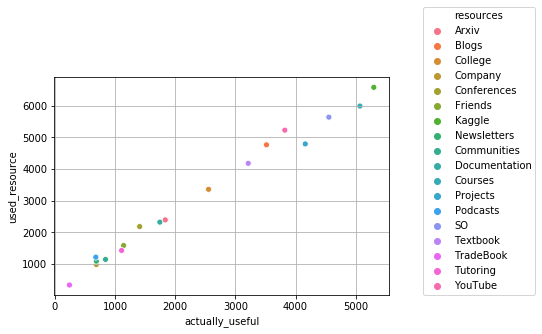

In [68]:

sns.scatterplot(learning_df['actually_useful'],learning_df['used_resource'],hue = learning_df['resources'],markers = ['x','o','v','^','<'])
plt.legend(loc = (1.1,0))
plt.grid()
plt.show()

* From the plot, we can observe that a lot of people used Kaggle  as learning platform and found useful.
* Top resources that are useful for learning are Kaggle, Stack Overflow, Online Courses, Youtube, Project, Blogs etc.
* People who learnt from Friends, Podcasts, Trade Books, Communities, Tutoring, arxiv found not that much useful.
* We can see that the number of people who used Youtube for learning are greater than Projects but the usefullness of Projects is more.


In [72]:
resource_columns = [col for col in DS if col.startswith('LearningPlatformUsefulness')]

resource_df = DS[resource_columns]
resource_df_after = resource_df.reindex(columns=resource_columns).fillna(0)
resource_df_after.head()

,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube
5,0,0,0,0,0,0,Very useful,0,0,0,Very useful,0,0,Very useful,Very useful,0,0,0
11,0,0,0,0,0,0,Somewhat useful,0,Very useful,0,0,Very useful,0,0,0,0,0,Somewhat useful
27,0,0,0,0,0,0,0,0,0,0,Very useful,Somewhat useful,0,Very useful,0,0,0,0
28,Very useful,Very useful,0,Somewhat useful,Somewhat useful,0,Somewhat useful,0,Somewhat useful,0,0,Very useful,Somewhat useful,Somewhat useful,Very useful,0,0,Somewhat useful
32,Very useful,Somewhat useful,0,0,0,0,0,0,0,0,0,0,0,Very useful,Very useful,0,0,0


In [75]:
used = []
increment=0;
actually_useful=[]
for i in resource_columns:
    count =0;
    for j in range(resource_df_after.shape[0]): 
        if(resource_df_after[i].iloc[j]!=0):
            count+=1
        if(resource_df_after[i].iloc[j]=='Very useful'):
            resource_df_after[i].iloc[j]=100
        if(resource_df_after[i].iloc[j]=='Somewhat useful'):
            resource_df_after[i].iloc[j]=50
        if(resource_df_after[i].iloc[j]=='Not Useful'):    
            resource_df_after[i].iloc[j]=0
    increment+=1        
    used.insert(increment,count)        
    actually_useful.insert(increment,resource_df_after[i].sum())           

In [76]:
resource_columns = [remove_cruft(s) for s in resource_columns]

In [77]:
learning_df = pd.DataFrame({'used_resource':used,'actually_useful':actually_useful})
total = learning_df['actually_useful'].sum()

for i in range(learning_df.shape[0]):
    learning_df['actually_useful'][i] = truediv(learning_df['actually_useful'][i],100)
learning_df['resources'] = resource_columns
learning_df.head()

,used_resource,actually_useful,resources
0,521,393,Arxiv
1,952,731,Blogs
2,445,344,College
3,280,206,Company
4,514,339,Conferences


In [80]:
DS['LearningPlatformUsefulnessSO'].value_counts()

Very useful        776
Somewhat useful    357
Not Useful          10
Name: LearningPlatformUsefulnessSO, dtype: int64

In [81]:
DS['LearningPlatformUsefulnessKaggle'].value_counts()

Very useful        621
Somewhat useful    505
Not Useful           6
Name: LearningPlatformUsefulnessKaggle, dtype: int64

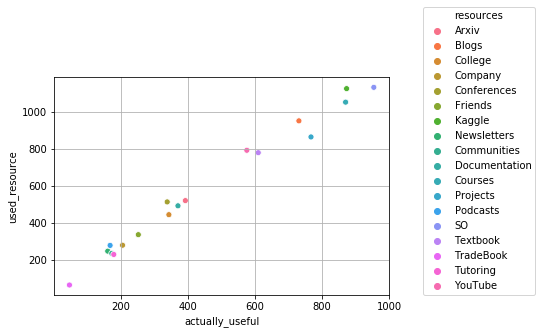

In [78]:
sns.scatterplot(learning_df['actually_useful'],learning_df['used_resource'],hue = learning_df['resources'],markers = ['x','o','v','^','<'])
plt.legend(loc = (1.1,0))
plt.grid()
plt.show()

* Surprisingly and Obviously many Data Scientists Learn (and copy code snippets) from StackOverflow. We can observe this in the above plot.
* The top resources used by Data Scientists are StackOverflow, Kaggle, Projects, Courses, Blogs.

## Job Skills

In [95]:
jobskill = data[['JobSkillImportanceBigData','JobSkillImportanceDegree','JobSkillImportanceStats','JobSkillImportanceEnterpriseTools',
                'JobSkillImportancePython','JobSkillImportanceR','JobSkillImportanceSQL','JobSkillImportanceKaggleRanking',
                'JobSkillImportanceMOOC','JobSkillImportanceVisualizations']]


In [96]:
skill_imp_count = jobskill.apply(pd.Series.value_counts)
skill_imp_count

,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,JobSkillImportancePython,JobSkillImportanceR,JobSkillImportanceSQL,JobSkillImportanceKaggleRanking,JobSkillImportanceMOOC,JobSkillImportanceVisualizations
Necessary,1503,1094,2035,535,2604,1636,1690,460,411,1761
Nice to have,2271,2338,1812,2087,1319,2027,1914,2621,2326,1898
Unnecessary,182,477,113,1072,108,281,288,789,1095,208


In [97]:
#giving Scores to the different Importance levels
scores = {'Necessary':5,'Nice to have':3,'Unnecessary':1}

avg_scores = []
counts = []
for i in skill_imp_count:
    count = skill_imp_count[i][0]+skill_imp_count[i][1]+skill_imp_count[i][2]
    skill = skill_imp_count[i][0]*scores['Necessary']+skill_imp_count[i][1]*scores['Nice to have']+skill_imp_count[i][2]*scores['Unnecessary']
    skill = skill/count
    avg_scores.append(skill)
    counts.append(count)

#modifying names
names = ['BigData','Degree','Stats','Tools','Python','R','SQL','KaggleRanking','MOOC','Visualizations']
plt_data=pd.DataFrame(data=[avg_scores,counts,names],dtype=float).transpose()
plt_data.columns=columns=('avg score','count','Skill')

In [98]:
plt_data

,avg score,count,Skill
0,3.66785,3956,BigData
1,3.31568,3909,Degree
2,3.97071,3960,Stats
3,2.70926,3694,Tools
4,4.2384,4031,Python
5,3.68712,3944,R
6,3.72045,3892,SQL
7,2.82997,3870,KaggleRanking
8,2.64301,3832,MOOC
9,3.80321,3867,Visualizations


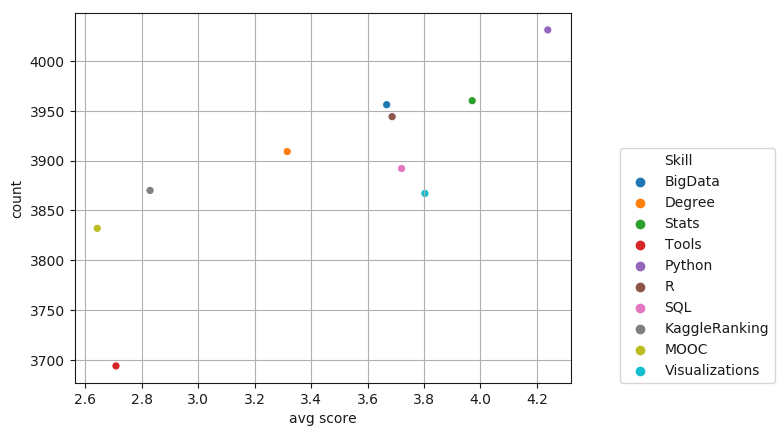

In [99]:
sns.scatterplot(plt_data['avg score'],plt_data['count'],hue = plt_data['Skill'],markers={"s": 100})
plt.legend(loc = (1.1,0))
plt.grid()

* By considering all Fields, Python is highly demanded job skill followed by Stats, Visualizations, SQL etc. 

In [127]:
jobskill = DS[['JobSkillImportanceBigData','JobSkillImportanceDegree','JobSkillImportanceStats','JobSkillImportanceEnterpriseTools',
                'JobSkillImportancePython','JobSkillImportanceR','JobSkillImportanceSQL','JobSkillImportanceKaggleRanking',
                'JobSkillImportanceMOOC','JobSkillImportanceVisualizations']]

skill_imp_count = jobskill.apply(pd.Series.value_counts)
skill_imp_count

scores = {'Necessary':5,'Nice to have':3,'Unnecessary':1}
#giving Scores to the different Importance levels
avg_scores = []
counts = []
for i in skill_imp_count:
    count = skill_imp_count[i][0]+skill_imp_count[i][1]+skill_imp_count[i][2]
    skill = skill_imp_count[i][0]*scores['Necessary']+skill_imp_count[i][1]*scores['Nice to have']+skill_imp_count[i][2]*scores['Unnecessary']
    skill = skill/count
    avg_scores.append(skill)
    counts.append(count)

#modifying names
names = ['BigData','Degree','Stats','Tools','Python','R','SQL','KaggleRanking','MOOC','Visualizations']
plt_data=pd.DataFrame(data=[avg_scores,counts,names],dtype=float).transpose()
plt_data.columns=columns=('avg score','count','Skill')


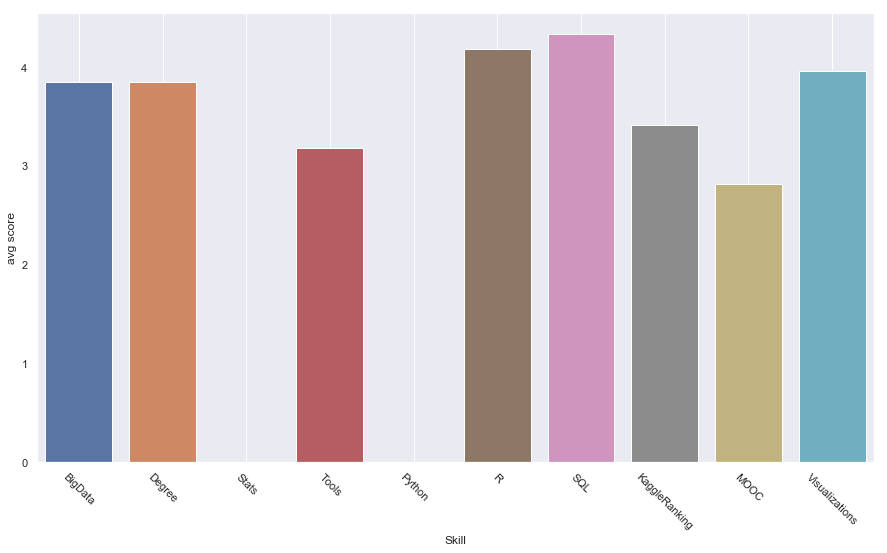

In [128]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.barplot(plt_data['Skill'],plt_data['avg score'])
plt.xticks(rotation = -45)
plt.grid()

* Even though python is mostly asked skill throughout many fields, SQL is the most preffered job skill for data scientists position followed by R,Data Visualisation. 
* Python is not considered as job skill for Data scientists.

# Methods/Algorithms used in each field.

In [149]:
methods = [col for col in data if col.startswith('WorkMethodsFrequency')]
methods = data[methods]
methods.head(3)

,WorkMethodsFrequencyA/B,WorkMethodsFrequencyAssociationRules,WorkMethodsFrequencyBayesian,WorkMethodsFrequencyCNNs,WorkMethodsFrequencyCollaborativeFiltering,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyEnsembleMethods,WorkMethodsFrequencyEvolutionaryApproaches,...,WorkMethodsFrequencyRecommenderSystems,WorkMethodsFrequencyRNNs,WorkMethodsFrequencySegmentation,WorkMethodsFrequencySimulation,WorkMethodsFrequencySVMs,WorkMethodsFrequencyTextAnalysis,WorkMethodsFrequencyTimeSeriesAnalysis,WorkMethodsFrequencySelect1,WorkMethodsFrequencySelect2,WorkMethodsFrequencySelect3
0,NaN,Rarely,NaN,NaN,Often,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
methods_count = methods.apply(pd.Series.value_counts)
methods_count

,WorkMethodsFrequencyA/B,WorkMethodsFrequencyAssociationRules,WorkMethodsFrequencyBayesian,WorkMethodsFrequencyCNNs,WorkMethodsFrequencyCollaborativeFiltering,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyEnsembleMethods,WorkMethodsFrequencyEvolutionaryApproaches,...,WorkMethodsFrequencyRecommenderSystems,WorkMethodsFrequencyRNNs,WorkMethodsFrequencySegmentation,WorkMethodsFrequencySimulation,WorkMethodsFrequencySVMs,WorkMethodsFrequencyTextAnalysis,WorkMethodsFrequencyTimeSeriesAnalysis,WorkMethodsFrequencySelect1,WorkMethodsFrequencySelect2,WorkMethodsFrequencySelect3
Most of the time,277,89,236,383,91,1632,2927,764,504,69,...,201,197,468,370,344,618,870,113,14,33
Often,656,328,622,473,257,1331,1487,1409,764,127,...,395,333,799,511,667,865,1149,53,12,24
Rarely,232,156,193,91,92,96,47,218,89,43,...,100,46,97,88,157,140,158,33,6,25
Sometimes,705,523,794,406,321,701,445,1191,626,175,...,416,272,613,382,735,708,895,34,7,11


In [151]:
#giving Scores to the different Importance levels
scores = {'Most of the time':100,'Often':75,'Sometimes':50,'Rarely':25}

avg_scores = []
counts = []
for i in methods_count:
    count = methods_count[i][0]+methods_count[i][1]+methods_count[i][2]+methods_count[i][3]
    skill = methods_count[i][0]*scores['Most of the time']+methods_count[i][1]*scores['Often']+methods_count[i][2]*scores['Rarely']+methods_count[i][3]*scores['Sometimes']
    skill = skill/count
    avg_scores.append(skill)
    counts.append(count)

#modifying names
names = ['A/B','AssociationRules','Bayesian','CNN','CollaborativeFiltering','Cross-Validation','DataVisualization','DecisionTrees','EnsembleMethods','EvolutionaryApproaches','FrequencyGANs', 'GBM','HMMs','KNN',
     'LiftAnalysis',
     'LogisticRegression','MLN',
     'NaiveBayes','NLP',
     'NeuralNetworks','PCA',
     'PrescriptiveModeling',
     'RandomForests',
     'RecommenderSystems','RNNs',
     'Segmentation','Simulation',
     'SVMs','TextAnalysis',
     'TimeSeriesAnalysis', 'WorkMethodsFrequencySelect1','Select2','Select3']
plt_data=pd.DataFrame(data=[avg_scores,counts,names],dtype=float).transpose()
plt_data.columns=columns=('avg score','count','Skill')

In [152]:
plt_data.head()

,avg score,count,Skill
0,63.0749,1870,A/B
1,57.9836,1096,AssociationRules
2,62.2087,1845,Bayesian
3,71.2121,1353,CNN
4,61.3995,761,CollaborativeFiltering


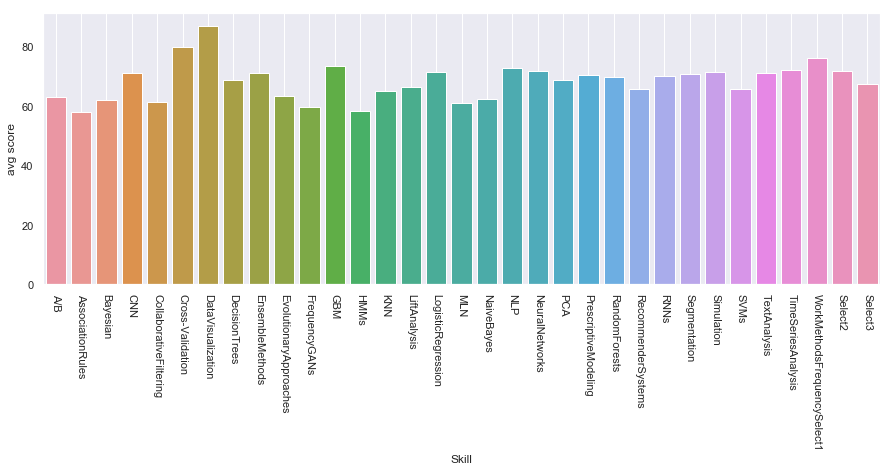

In [153]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(plt_data['Skill'],plt_data['avg score'])
plt.xticks(rotation = -90)
plt.grid()

* Seeing the Bar graph we can clearly say that Data Visualisation is mostly use method in every field.
* Top methods are Data Visualisation, cross-validation, GBM, CNN, Ensembles, Decision Trees etc.

### Insights of methods used by data scientists

In [140]:
scores = {'Most of the time':100,'Often':75,'Sometimes':50,'Rarely':25}

comparision_data = []
for j in  DS,STS,ML,SE:
    methods = [col for col in DS if col.startswith('WorkMethodsFrequency')]
    methods = j[methods]
    methods_count = methods.apply(pd.Series.value_counts)
    avg_scores = []
    counts = []
    for i in methods_count:
        count = methods_count[i][0]+methods_count[i][1]+methods_count[i][2]+methods_count[i][3]
        skill = methods_count[i][0]*scores['Most of the time']+methods_count[i][1]*scores['Often']+methods_count[i][2]*scores['Rarely']+methods_count[i][3]*scores['Sometimes']
        skill = skill/count
        avg_scores.append(skill)
        counts.append(count)

    #modifying names
    names = ['A/B','AssociationRules','Bayesian','CNN','CollaborativeFiltering','Cross-Validation','DataVisualization','DecisionTrees','EnsembleMethods','EvolutionaryApproaches','FrequencyGANs', 'GBM','HMMs','KNN',
         'LiftAnalysis',
         'LogisticRegression','MLN',
         'NaiveBayes','NLP',
         'NeuralNetworks','PCA',
         'PrescriptiveModeling',
         'RandomForests',
         'RecommenderSystems','RNNs',
         'Segmentation','Simulation',
         'SVMs','TextAnalysis',
         'TimeSeriesAnalysis', 'Select1','Select2','Select3']
    plt_data=pd.DataFrame(data=[avg_scores,counts,names],dtype=float).transpose()
    plt_data.columns=columns=('avg score','count','Skill')
    comparision_data.append(plt_data.copy())

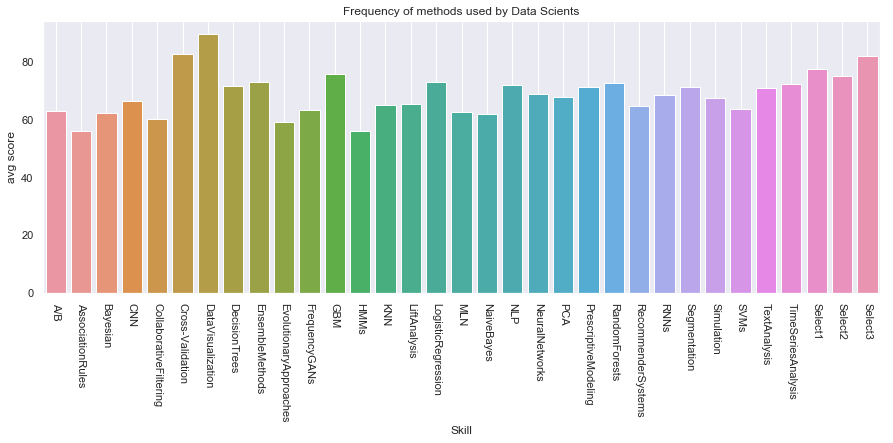

In [157]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(comparision_data[0]['Skill'],comparision_data[0]['avg score'])
plt.title('Frequency of methods used by Data Scients')
plt.xticks(rotation = -90)
plt.grid()

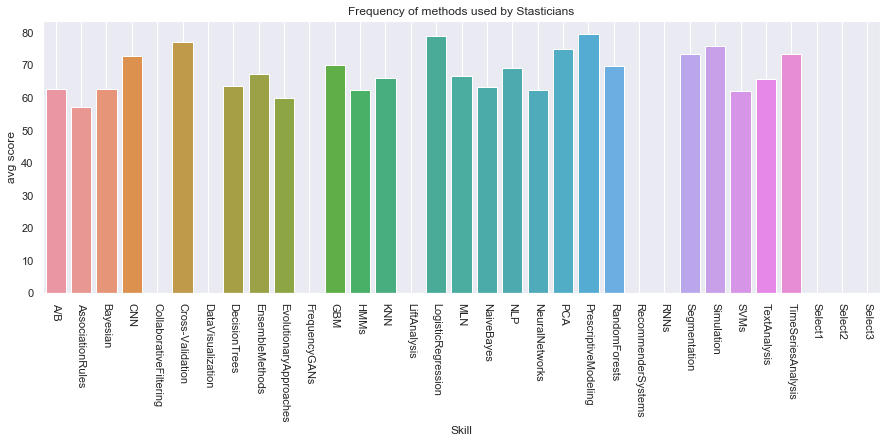

In [158]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(comparision_data[1]['Skill'],comparision_data[1]['avg score'])
plt.title('Frequency of methods used by Stasticians')
plt.xticks(rotation = -90)
plt.grid()

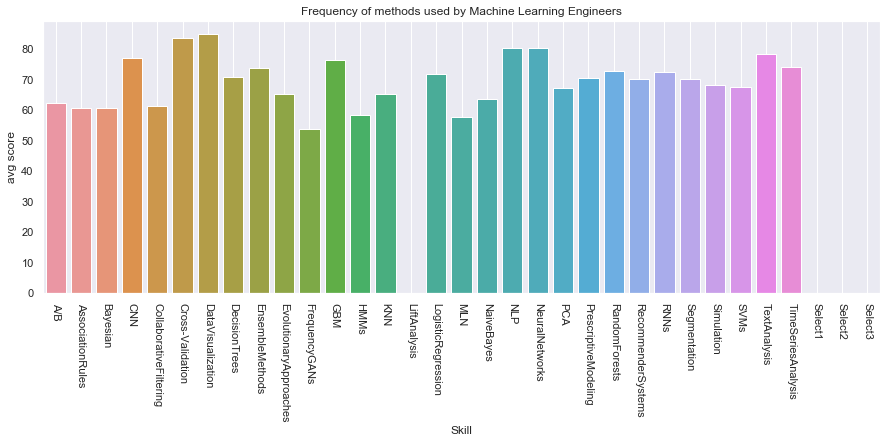

In [159]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(comparision_data[2]['Skill'],comparision_data[2]['avg score'])
plt.title('Frequency of methods used by Machine Learning Engineers')
plt.xticks(rotation = -90)
plt.grid()

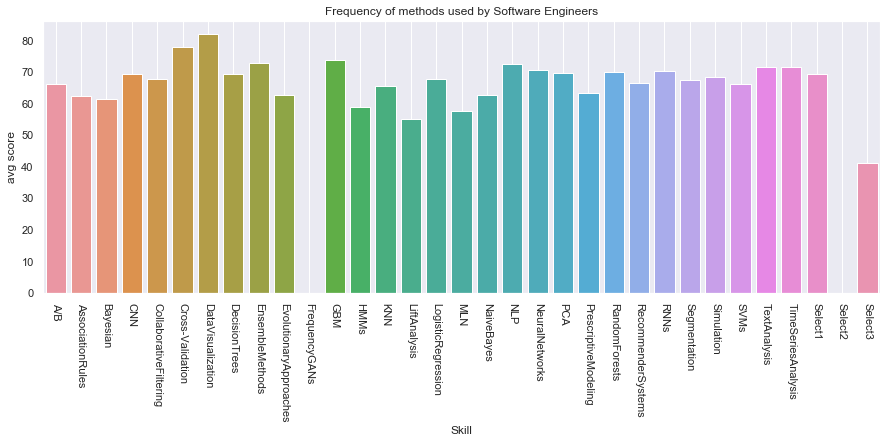

In [160]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(comparision_data[3]['Skill'],comparision_data[3]['avg score'])
plt.title('Frequency of methods used by Software Engineers')
plt.xticks(rotation = -90)
plt.grid()

* Top methods used by Data Scientists are Data visualisations, cross-validation, Gradient Boosting, Ensembles etc.
* Top methods used by Statisticians are logistic regressions, Prescriptive modelling, Cross validation, PCA etc.
* Top methods used by Machine Learning Engineers are Data visualisations, cross-validation, NLP, Neural Networks, CNN etc
* Top methods used by Software Emgineers are Data visualisations, cross-validation, Gradient Boosting, Ensembles etc.

# Tools 

In [193]:
tools = [col for col in data if col.startswith('WorkToolsFrequency')]
tools = data[tools]
tools.head(3)

,WorkToolsFrequencyAmazonML,WorkToolsFrequencyAWS,WorkToolsFrequencyAngoss,WorkToolsFrequencyC,WorkToolsFrequencyCloudera,WorkToolsFrequencyDataRobot,WorkToolsFrequencyFlume,WorkToolsFrequencyGCP,WorkToolsFrequencyHadoop,WorkToolsFrequencyIBMCognos,...,WorkToolsFrequencySpark,WorkToolsFrequencySQL,WorkToolsFrequencyStan,WorkToolsFrequencyStatistica,WorkToolsFrequencyTableau,WorkToolsFrequencyTensorFlow,WorkToolsFrequencyTIBCO,WorkToolsFrequencyUnix,WorkToolsFrequencySelect1,WorkToolsFrequencySelect2
0,NaN,Rarely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
tools_count = tools.apply(pd.Series.value_counts)
col = tools_count.columns
tools_count

,WorkToolsFrequencyAmazonML,WorkToolsFrequencyAWS,WorkToolsFrequencyAngoss,WorkToolsFrequencyC,WorkToolsFrequencyCloudera,WorkToolsFrequencyDataRobot,WorkToolsFrequencyFlume,WorkToolsFrequencyGCP,WorkToolsFrequencyHadoop,WorkToolsFrequencyIBMCognos,...,WorkToolsFrequencySpark,WorkToolsFrequencySQL,WorkToolsFrequencyStan,WorkToolsFrequencyStatistica,WorkToolsFrequencyTableau,WorkToolsFrequencyTensorFlow,WorkToolsFrequencyTIBCO,WorkToolsFrequencyUnix,WorkToolsFrequencySelect1,WorkToolsFrequencySelect2
Most of the time,21,516,5,289,109,12,25,96,293,23,...,326,2088,8,4,360,450,29,798,330,54
Often,75,496,2,336,125,15,29,136,381,41,...,349,1168,23,8,395,622,33,617,183,33
Rarely,161,322,9,372,76,24,27,112,223,48,...,178,185,49,13,309,320,31,76,53,15
Sometimes,142,486,6,504,129,12,60,180,440,43,...,472,747,72,17,520,830,46,337,120,33


In [195]:
#giving Scores to the different Importance levels
scores = {'Most of the time':100,'Often':75,'Sometimes':50,'Rarely':25}

avg_scores = []
counts = []
for i in tools_count:
    count = tools_count[i][0]+tools_count[i][1]+tools_count[i][2]+tools_count[i][3]
    skill = tools_count[i][0]*scores['Most of the time']+tools_count[i][1]*scores['Often']+tools_count[i][2]*scores['Rarely']+tools_count[i][3]*scores['Sometimes']
    skill = skill/count
    avg_scores.append(skill)
    counts.append(count)

#modifying names
names = ['AmazonML', 'AWS',
       'Angoss', 'C',
       'Cloudera', 'DataRobot',
       'Flume', 'GCP',
       'Hadoop', 'IBMCognos',
       'IBMSPSSModeler',
       'IBMSPSSStatistics', 'IBMWatson',
       'Impala', 'Java',
       'Julia', 'Jupyter',
       'KNIMECommercial', 'KNIMEFree',
       'Mathematica', 'MATLAB',
       'Azure', 'Excel',
       'MicrosoftRServer', 'MicrosoftSQL',
       'Minitab', 'NoSQL',
       'Oracle', 'Orange',
       'Perl', 'Python',
       'Qlik', 'R',
       'RapidMinerCommercial',
       'RapidMinerFree', 'Salfrod',
       'SAPBusinessObjects', 'SASBase',
       'SASEnterprise', 'SASJMP',
       'Spark', 'SQL',
       'Stan', 'Statistica',
       'Tableau', 'TensorFlow',
       'TIBCO', 'Unix',
       'Select1', 'Select2']
plt_data=pd.DataFrame(data=[avg_scores,counts,names],dtype=float).transpose()
plt_data.columns=columns=('avg score','count','Skill')

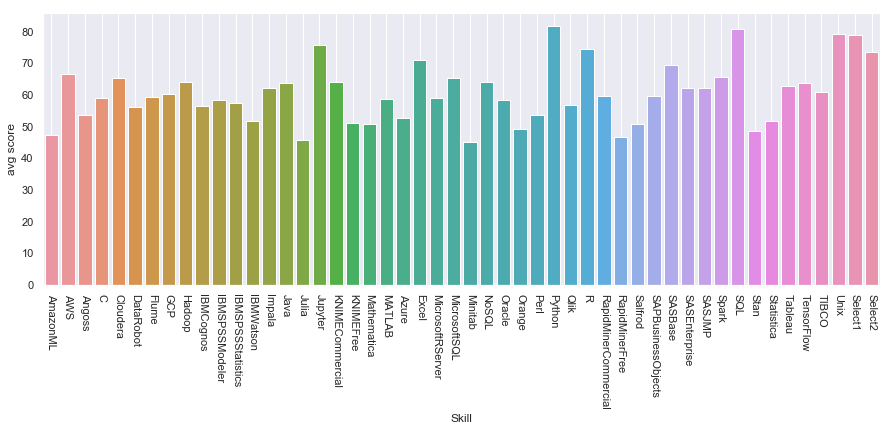

In [196]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(plt_data['Skill'],plt_data['avg score'])
plt.xticks(rotation = -90)
plt.grid()

* Mostly used Tools are SQL, Python, Jupyter, Java, AWS etc.

In [184]:
comparision_data = []
for j in  DS,STS,ML,SE:
    tools = [col for col in j if col.startswith('WorkToolsFrequency')]
    tools = j[tools]
    tools_count = tools.apply(pd.Series.value_counts)
    avg_scores = []
    counts = []
    for i in tools_count:
        count = tools_count[i][0]+tools_count[i][1]+tools_count[i][2]+tools_count[i][3]
        skill = tools_count[i][0]*scores['Most of the time']+tools_count[i][1]*scores['Often']+tools_count[i][2]*scores['Rarely']+tools_count[i][3]*scores['Sometimes']
        skill = skill/count
        avg_scores.append(skill)
        counts.append(count)

    #modifying names
    names = ['AmazonML', 'AWS',
       'Angoss', 'C',
       'Cloudera', 'DataRobot',
       'Flume', 'GCP',
       'Hadoop', 'IBMCognos',
       'IBMSPSSModeler',
       'IBMSPSSStatistics', 'IBMWatson',
       'Impala', 'Java',
       'Julia', 'Jupyter',
       'KNIMECommercial', 'KNIMEFree',
       'Mathematica', 'MATLAB',
       'Azure', 'Excel',
       'MicrosoftRServer', 'MicrosoftSQL',
       'Minitab', 'NoSQL',
       'Oracle', 'Orange',
       'Perl', 'Python',
       'Qlik', 'R',
       'RapidMinerCommercial',
       'RapidMinerFree', 'Salfrod',
       'SAPBusinessObjects', 'SASBase',
       'SASEnterprise', 'SASJMP',
       'Spark', 'SQL',
       'Stan', 'Statistica',
       'Tableau', 'TensorFlow',
       'TIBCO', 'Unix',
       'Select1', 'Select2']
    plt_data=pd.DataFrame(data=[avg_scores,counts,names],dtype=float).transpose()
    plt_data.columns=columns=('avg score','count','Skill')
    comparision_data.append(plt_data.copy())

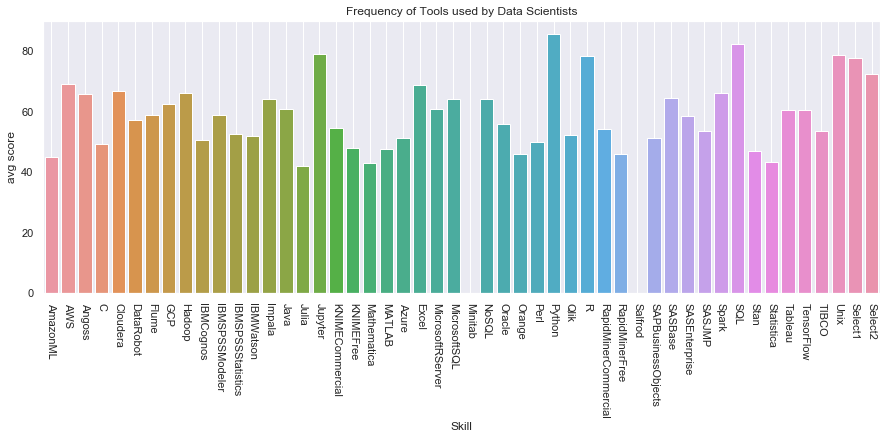

In [203]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(comparision_data[0]['Skill'],comparision_data[0]['avg score'])
plt.title('Frequency of Tools used by Data Scientists')
plt.xticks(rotation = -90)
plt.grid()

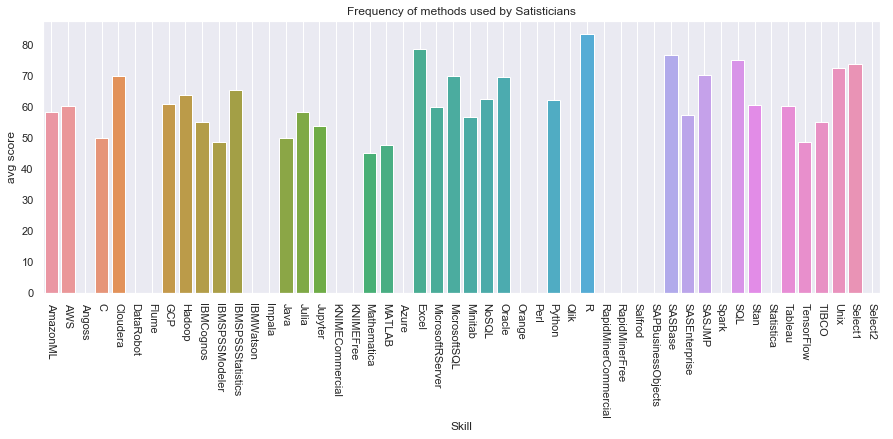

In [199]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(comparision_data[1]['Skill'],comparision_data[1]['avg score'])
plt.title('Frequency of methods used by Satisticians')
plt.xticks(rotation = -90)
plt.grid()

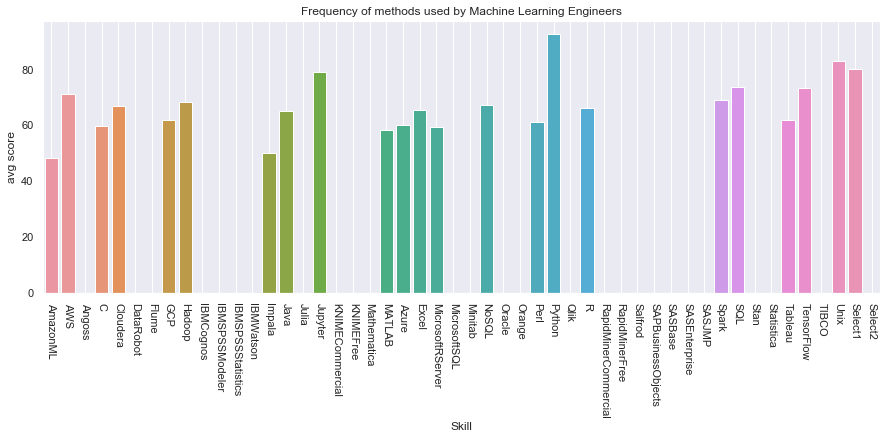

In [200]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(comparision_data[2]['Skill'],comparision_data[2]['avg score'])
plt.title('Frequency of methods used by Machine Learning Engineers')
plt.xticks(rotation = -90)
plt.grid()

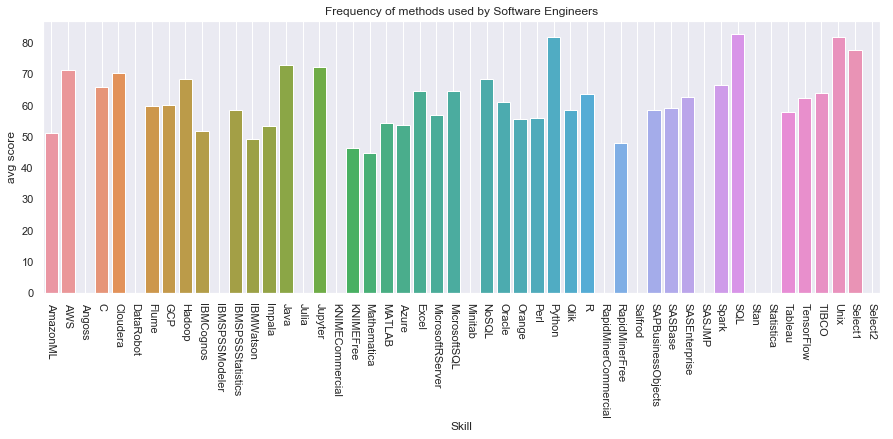

In [202]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(comparision_data[3]['Skill'],comparision_data[3]['avg score'])
plt.title('Frequency of methods used by Software Engineers')
plt.xticks(rotation = -90)
plt.grid()

* Python, SQL, R, Jupyter etc are the tools widely used by Data Scientists.
* R, Excel, SASBase, SQL etc are the tools widely used by Statisticians.
* Python, SQL, AWS, R etc are the tools widely used by Machine Learning Engineers.
* Python, SQL, Unix, Java etc are the tools widely used by the Software Engineers.

### Majors

In [9]:
majors = data['MajorSelect'].unique()
fields = data['CurrentJobTitleSelect'].unique()
majors = [x for x in majors if str(x) != 'nan']
fields = [x for x in fields if str(x) != 'nan']

In [10]:
k = data.shape[0]
count_list = []
for i in fields:
    temp = []
    count = 0
    for j in majors:
        for _ in range(k):
            if(data['MajorSelect'][_]==j and data['CurrentJobTitleSelect'][_]==i):count = count + 1
        temp.append(count)
        count = 0
    count_list.append(temp)

In [11]:
ratio_list = []
for i in count_list:
    total = sum(i)
    temp = []
    for j in i:
        temp.append((j/total)*100)
    ratio_list.append(temp)

count_list = np.array(count_list).transpose()
ratio_list = np.array(ratio_list).transpose()

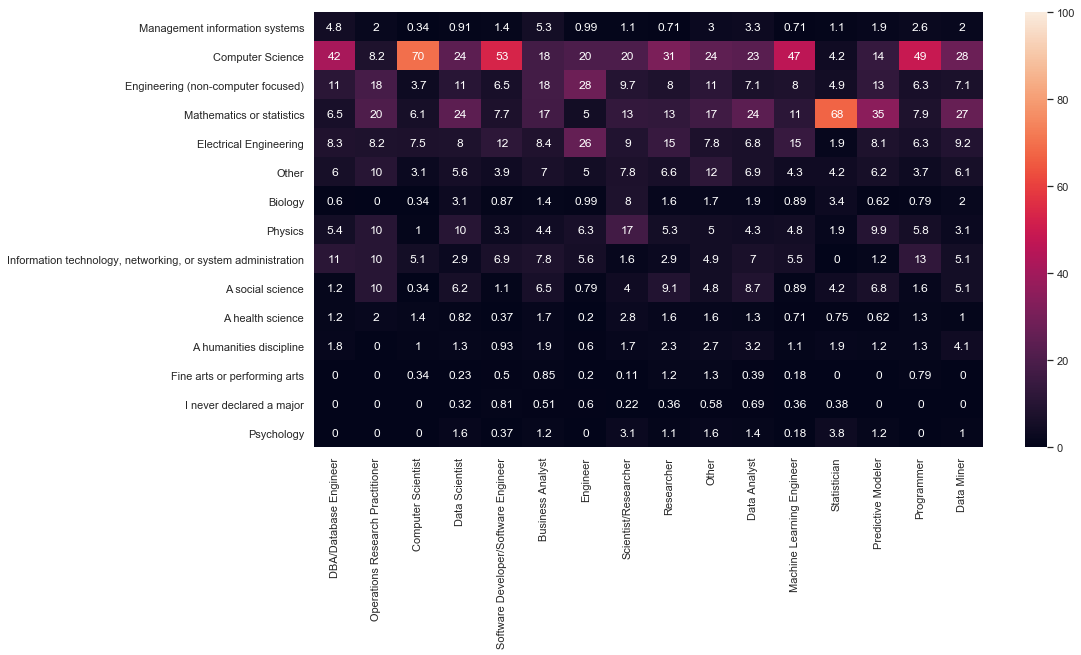

In [18]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data=ratio_list,xticklabels=fields,yticklabels=majors,annot = True,vmin = 0,vmax =100)
plt.show()

*  There was always a question on what Major a person should choose to get into a specified path.
* If we look at the Heat maps, we can say each field has employee from almost all Majors, but varying the percentage of population. 
* If you have true passion towards a field of work, Major will not be an obstacle.

### Path to become Data Scientist
* Learn Python Language Since it is mostly used programming Languages by Data Scientists followed by R (second most preffered language).

* Use Learning Resources such as Kaggle, StackOverflow, Youtube, Online Courses and Projects to become a good Data Scientist.
* To excel your career as Data Scientist, the major job skills required are SQL, visualizations etc. as most of the companies prefer them.
* Learn the top methods used by Datascients such as  Data visualisations, cross-validation, Gradient Boosting, Ensembles etc.
* Get a grip on tools such as Python, SQL, R, Jupyter etc
* To become a Data Scientist, Major you are going to pursue will not be an obstacle. But most of the Data Scientists come from Computer Science, Engineering, Statisticians backgrounds. Choosing them as a Major may slightly benifit you.


### Job Satisfaction

In [47]:
ds_sat = DS['JobSatisfaction']
ds_sat = ds_sat[ds_sat != 'I prefer not to share']

In [48]:
#replacing the long strings with short ones
ds_sat[ds_sat == '10 - Highly Satisfied']=10
ds_sat[ds_sat == '1 - Highly Dissatisfied']=1

In [54]:
sat_counts = list(ds_sat.value_counts(sort = False))
sat_counts

[20, 22, 62, 68, 124, 182, 428, 464, 262, 175]

In [62]:
not_satisfied = sum(sat_counts[:4])
satisfied = sum(sat_counts[4:7])
high_satisfied = sum(sat_counts[7:])

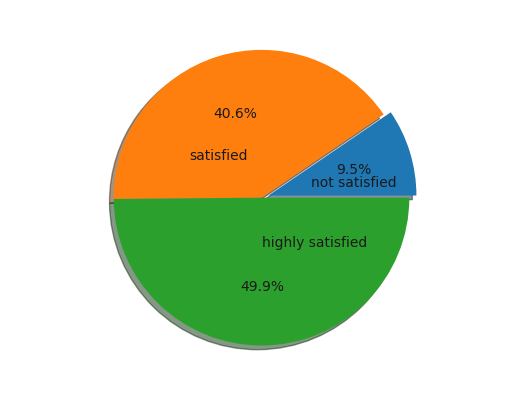

In [93]:
sums = [not_satisfied,satisfied,high_satisfied]
mpl.style.use('default')
plt.axis('equal');
explode = (0.05,0, 0)
plt.pie(sums,labels = ['not satisfied','satisfied','highly satisfied'],explode=explode,labeldistance= 0.3, autopct='%1.1f%%', shadow=True)
plt.show()

* Almost 90% are highly satisfied being Data Scientists. Only a few(9.5%) are not satisfied.